In [117]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [118]:
data = pd.read_csv("Datasets/SMS_Spam/spam.csv", encoding="ISO-8859-1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [119]:
data.shape

(5572, 5)

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [121]:
data = data.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])
data = data.rename(columns={"v1": "target", "v2":"text"})
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [122]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data["target"] = encoder.fit_transform(data["target"])

In [123]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [124]:
data.duplicated().sum()

403

In [125]:
data = data.drop_duplicates(keep="first")
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


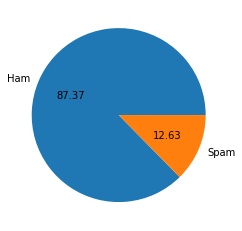

In [126]:
import matplotlib.pyplot as plt
plt.pie(data["target"].value_counts(), labels=["Ham", "Spam"], autopct="%0.2f")
plt.show()

In [127]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ninja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [128]:
data["characters_count"] = data["text"].apply(len)
data.head()

,target,text,characters_count
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [129]:
data["words_count"] = data["text"].apply(lambda x: len(nltk.word_tokenize(x)))
data.head()

,target,text,characters_count,words_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [130]:
data["sentence_count"] = data["text"].apply(lambda x: len(nltk.sent_tokenize(x)))
data.head()

,target,text,characters_count,words_count,sentence_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [131]:
data[["characters_count", "words_count", "sentence_count"]].describe()

,characters_count,words_count,sentence_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [132]:
plt.figure(figsize=(12,6))

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='characters_count', ylabel='Count'>

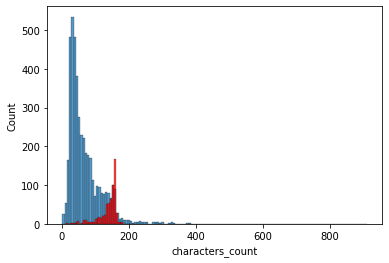

In [133]:
sns.histplot(data[data["target"] == 0]["characters_count"])
sns.histplot(data[data["target"] == 1]["characters_count"], color="red")

<AxesSubplot:xlabel='words_count', ylabel='Count'>

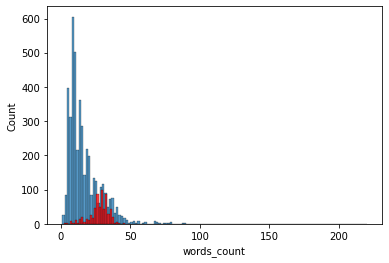

In [134]:
sns.histplot(data[data["target"] == 0]["words_count"])
sns.histplot(data[data["target"] == 1]["words_count"], color="red")

<AxesSubplot:xlabel='sentence_count', ylabel='Count'>

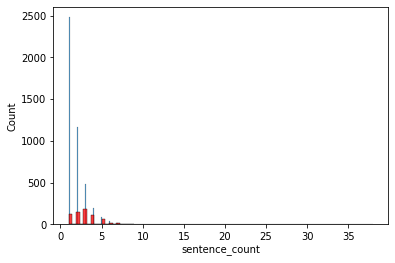

In [135]:
sns.histplot(data[data["target"] == 0]["sentence_count"])
sns.histplot(data[data["target"] == 1]["sentence_count"], color="red")

In [136]:
corr_matrix = data.corr()
corr_matrix["target"].sort_values(ascending=False)

target              1.000000
characters_count    0.384717
sentence_count      0.267602
words_count         0.262969
Name: target, dtype: float64

In [141]:
import string
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [143]:
data["transformed_text"] = data["text"].apply(transform_text)

In [144]:
data.head()

,target,text,characters_count,words_count,sentence_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [145]:
backup_data = data.to_csv("Backup_datasets/SMS_Spam(fifth_project).csv")

In [146]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
spam_wc = wc.generate(data[data['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [148]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [149]:
X = tfidf.fit_transform(data['transformed_text']).toarray()
y = data['target'].values

In [150]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [152]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [156]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [154]:
import pickle
pickle.dump(mnb,open('models/SMS_spam.pkl','wb'))

In [173]:
sample_inputs = "Congratulations! You've won a $1 ,ooo Walmart gift card. Go to http://bit.ly/1 23456 to claim now"

In [174]:
vector_input = transform_text(sample_inputs)
vectorize = tfidf.transform([vector_input])
result = mnb.predict(vectorize)[0]


In [175]:
if result == 0:
    print("Not Spam")
elif result == 1:
    print("Spam")

Spam
